# Supervised Learning

## 1) Regression

### 1-1) Logistic Regression from scratch

In [182]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

In [183]:
m = 100 # 데이터 개수(sample, example)

In [184]:
# 어른 키와 몸무게
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

In [185]:
adult_height

array([[ 175.24863646],
       [ 179.19262331],
       [ 175.12084753],
       [ 175.39512253],
       [ 177.23431799],
       [ 169.68017029],
       [ 175.01039233],
       [ 168.26093368],
       [ 181.62116662],
       [ 174.36653398],
       [ 175.88997382],
       [ 174.78001994],
       [ 178.89018091],
       [ 179.15191303],
       [ 171.90567539],
       [ 173.86956949],
       [ 186.70956753],
       [ 183.74515163],
       [ 173.0536424 ],
       [ 173.06104833],
       [ 181.36242628],
       [ 174.52531851],
       [ 175.99911513],
       [ 174.25834493],
       [ 181.67548499],
       [ 176.72400484],
       [ 178.76853497],
       [ 178.22647642],
       [ 173.54524375],
       [ 182.35826895],
       [ 166.07537953],
       [ 166.42172606],
       [ 172.71831672],
       [ 172.42454013],
       [ 177.53651446],
       [ 174.76628816],
       [ 172.9367933 ],
       [ 172.52756594],
       [ 163.57461191],
       [ 176.37942519],
       [ 181.57840643],
       [ 175.800

In [186]:
adult_height

array([[ 175.24863646],
       [ 179.19262331],
       [ 175.12084753],
       [ 175.39512253],
       [ 177.23431799],
       [ 169.68017029],
       [ 175.01039233],
       [ 168.26093368],
       [ 181.62116662],
       [ 174.36653398],
       [ 175.88997382],
       [ 174.78001994],
       [ 178.89018091],
       [ 179.15191303],
       [ 171.90567539],
       [ 173.86956949],
       [ 186.70956753],
       [ 183.74515163],
       [ 173.0536424 ],
       [ 173.06104833],
       [ 181.36242628],
       [ 174.52531851],
       [ 175.99911513],
       [ 174.25834493],
       [ 181.67548499],
       [ 176.72400484],
       [ 178.76853497],
       [ 178.22647642],
       [ 173.54524375],
       [ 182.35826895],
       [ 166.07537953],
       [ 166.42172606],
       [ 172.71831672],
       [ 172.42454013],
       [ 177.53651446],
       [ 174.76628816],
       [ 172.9367933 ],
       [ 172.52756594],
       [ 163.57461191],
       [ 176.37942519],
       [ 181.57840643],
       [ 175.800

In [187]:
adult_dataset = np.concatenate((adult_weight, adult_height), axis = 1)
print (adult_dataset.shape)
print (adult_dataset)

(100, 2)
[[  75.85906336  175.24863646]
 [  72.90969339  179.19262331]
 [  75.15745234  175.12084753]
 [  75.37294454  175.39512253]
 [  74.83779195  177.23431799]
 [  71.35043272  169.68017029]
 [  72.31232874  175.01039233]
 [  73.43018386  168.26093368]
 [  65.41852907  181.62116662]
 [  67.37282189  174.36653398]
 [  68.37788901  175.88997382]
 [  70.27032509  174.78001994]
 [  72.26260219  178.89018091]
 [  66.00003462  179.15191303]
 [  70.6042513   171.90567539]
 [  72.88911739  173.86956949]
 [  72.86492371  186.70956753]
 [  64.50693751  183.74515163]
 [  76.11504196  173.0536424 ]
 [  74.82992555  173.06104833]
 [  72.27286978  181.36242628]
 [  67.62487331  174.52531851]
 [  69.90299683  175.99911513]
 [  73.48808002  174.25834493]
 [  69.22883337  181.67548499]
 [  72.13249595  176.72400484]
 [  68.63310431  178.76853497]
 [  73.35583748  178.22647642]
 [  65.6434213   173.54524375]
 [  67.91758742  182.35826895]
 [  69.68062237  166.07537953]
 [  70.81405258  166.42172606]

In [188]:
# 아이 키와 몸무게
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

In [189]:
child_dataset = np.concatenate((child_weight, child_height), axis = 1)
print (child_dataset.shape)
print (child_dataset)

(100, 2)
[[  28.43881174  114.78996057]
 [  31.51191164  111.68640422]
 [  23.16866588  124.40599026]
 [  31.75599073  121.66226316]
 [  32.42876816  129.78642634]
 [  19.67650313  118.45837226]
 [  25.90194657  119.45492952]
 [  30.67715328  116.74805316]
 [  28.77986564  107.45353408]
 [  32.95282706  120.40787721]
 [  35.71185362  115.52952201]
 [  30.04262818  116.38357234]
 [  34.58953751  120.41571355]
 [  30.80839672  123.99390511]
 [  31.12755042  127.37814683]
 [  26.64403762  114.39729889]
 [  34.21514443  119.70442767]
 [  27.9092765   115.91184812]
 [  33.42684685  113.08825826]
 [  29.39839043  121.42911882]
 [  25.80842597  130.6958166 ]
 [  25.85102995  114.37356923]
 [  27.440441    129.92960643]
 [  38.06609384  118.90384947]
 [  32.15993667  117.03805486]
 [  24.98323341  121.15300123]
 [  31.68500326  126.90289881]
 [  40.22351713  124.37128319]
 [  31.39025908  122.48148702]
 [  22.97152146  119.82571766]
 [  22.5233547   131.38086305]
 [  28.79762659  122.20650388]

In [190]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
print (total_dataset.shape)
print (total_dataset)

(200, 2)
[[  75.85906336  175.24863646]
 [  72.90969339  179.19262331]
 [  75.15745234  175.12084753]
 [  75.37294454  175.39512253]
 [  74.83779195  177.23431799]
 [  71.35043272  169.68017029]
 [  72.31232874  175.01039233]
 [  73.43018386  168.26093368]
 [  65.41852907  181.62116662]
 [  67.37282189  174.36653398]
 [  68.37788901  175.88997382]
 [  70.27032509  174.78001994]
 [  72.26260219  178.89018091]
 [  66.00003462  179.15191303]
 [  70.6042513   171.90567539]
 [  72.88911739  173.86956949]
 [  72.86492371  186.70956753]
 [  64.50693751  183.74515163]
 [  76.11504196  173.0536424 ]
 [  74.82992555  173.06104833]
 [  72.27286978  181.36242628]
 [  67.62487331  174.52531851]
 [  69.90299683  175.99911513]
 [  73.48808002  174.25834493]
 [  69.22883337  181.67548499]
 [  72.13249595  176.72400484]
 [  68.63310431  178.76853497]
 [  73.35583748  178.22647642]
 [  65.6434213   173.54524375]
 [  67.91758742  182.35826895]
 [  69.68062237  166.07537953]
 [  70.81405258  166.42172606]

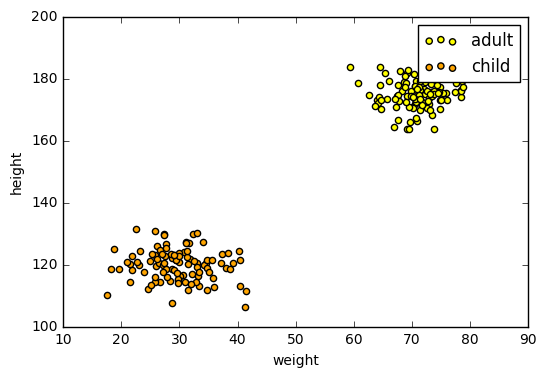

In [191]:
plt.scatter(total_dataset[:100,0], total_dataset[:100,1], c='yellow', label = 'adult')
plt.scatter(total_dataset[100:,0], total_dataset[100:,1], c='orange', label = 'child')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

In [192]:
# 어른 : 1, 아이 : 0
adult_label = np.ones(shape=[m,1])
child_label = np.zeros(shape=[m,1])
total_label = np.concatenate((adult_label, child_label))
print (total_label.shape)
print (total_label)

(200, 1)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0

In [193]:
total = np.concatenate((total_dataset , total_label), axis=1)
print (total.shape)
print (total)

(200, 3)
[[  75.85906336  175.24863646    1.        ]
 [  72.90969339  179.19262331    1.        ]
 [  75.15745234  175.12084753    1.        ]
 [  75.37294454  175.39512253    1.        ]
 [  74.83779195  177.23431799    1.        ]
 [  71.35043272  169.68017029    1.        ]
 [  72.31232874  175.01039233    1.        ]
 [  73.43018386  168.26093368    1.        ]
 [  65.41852907  181.62116662    1.        ]
 [  67.37282189  174.36653398    1.        ]
 [  68.37788901  175.88997382    1.        ]
 [  70.27032509  174.78001994    1.        ]
 [  72.26260219  178.89018091    1.        ]
 [  66.00003462  179.15191303    1.        ]
 [  70.6042513   171.90567539    1.        ]
 [  72.88911739  173.86956949    1.        ]
 [  72.86492371  186.70956753    1.        ]
 [  64.50693751  183.74515163    1.        ]
 [  76.11504196  173.0536424     1.        ]
 [  74.82992555  173.06104833    1.        ]
 [  72.27286978  181.36242628    1.        ]
 [  67.62487331  174.52531851    1.        ]
 

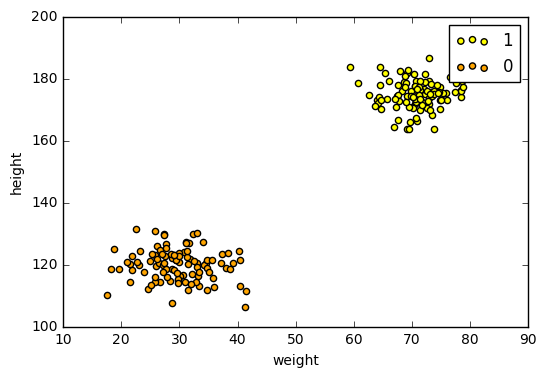

In [194]:
plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

# Step 2. Model definition

In [195]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [196]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [197]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [198]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum(x * (y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum(y - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [199]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [202]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total[:, :2] # weight, height
y = total[:, 2:3] # label

cost = 1.38629436112
w = [[ 0.20513594  0.27445756]]
b = [-0.01]


cost = 39.0030585367
w = [[-0.09246304 -0.9245706 ]]
b = [ 0.]


cost = 168.154884389
w = [[ 0.61540783  0.82337267]]
b = [-0.01]


cost = 117.02917561
w = [[ 0.31780885 -0.37565548]]
b = [ -3.00107161e-16]


cost = 43.1656851058
w = [[ 1.02567971  1.37228778]]
b = [-0.01]


cost = 195.055292684
w = [[ 0.72808073  0.17325963]]
b = [-0.02]


cost = 42.421925727
w = [[ 0.43048175 -1.02576853]]
b = [-0.01]


cost = 148.835969853
w = [[ 1.13835262  0.72217474]]
b = [-0.02]


cost = 120.4480428
w = [[ 0.84075364 -0.47685341]]
b = [-0.01]


cost = 23.8467705742
w = [[ 1.5486245   1.27108985]]
b = [-0.02]


cost = 198.474159071
w = [[ 1.25102552  0.0720617 ]]
b = [-0.03]


cost = 45.8407921138
w = [[ 0.95342654 -1.12696646]]
b = [-0.02]


cost = 129.51705656
w = [[ 1.66129741  0.62097681]]
b = [-0.03]


cost = 123.866909187
w = [[ 1.36369843 -0.57805134]]
b = [-0.02246643]


cost = 5.24694664865
w = [[ 1.88637563  0.74206828]]

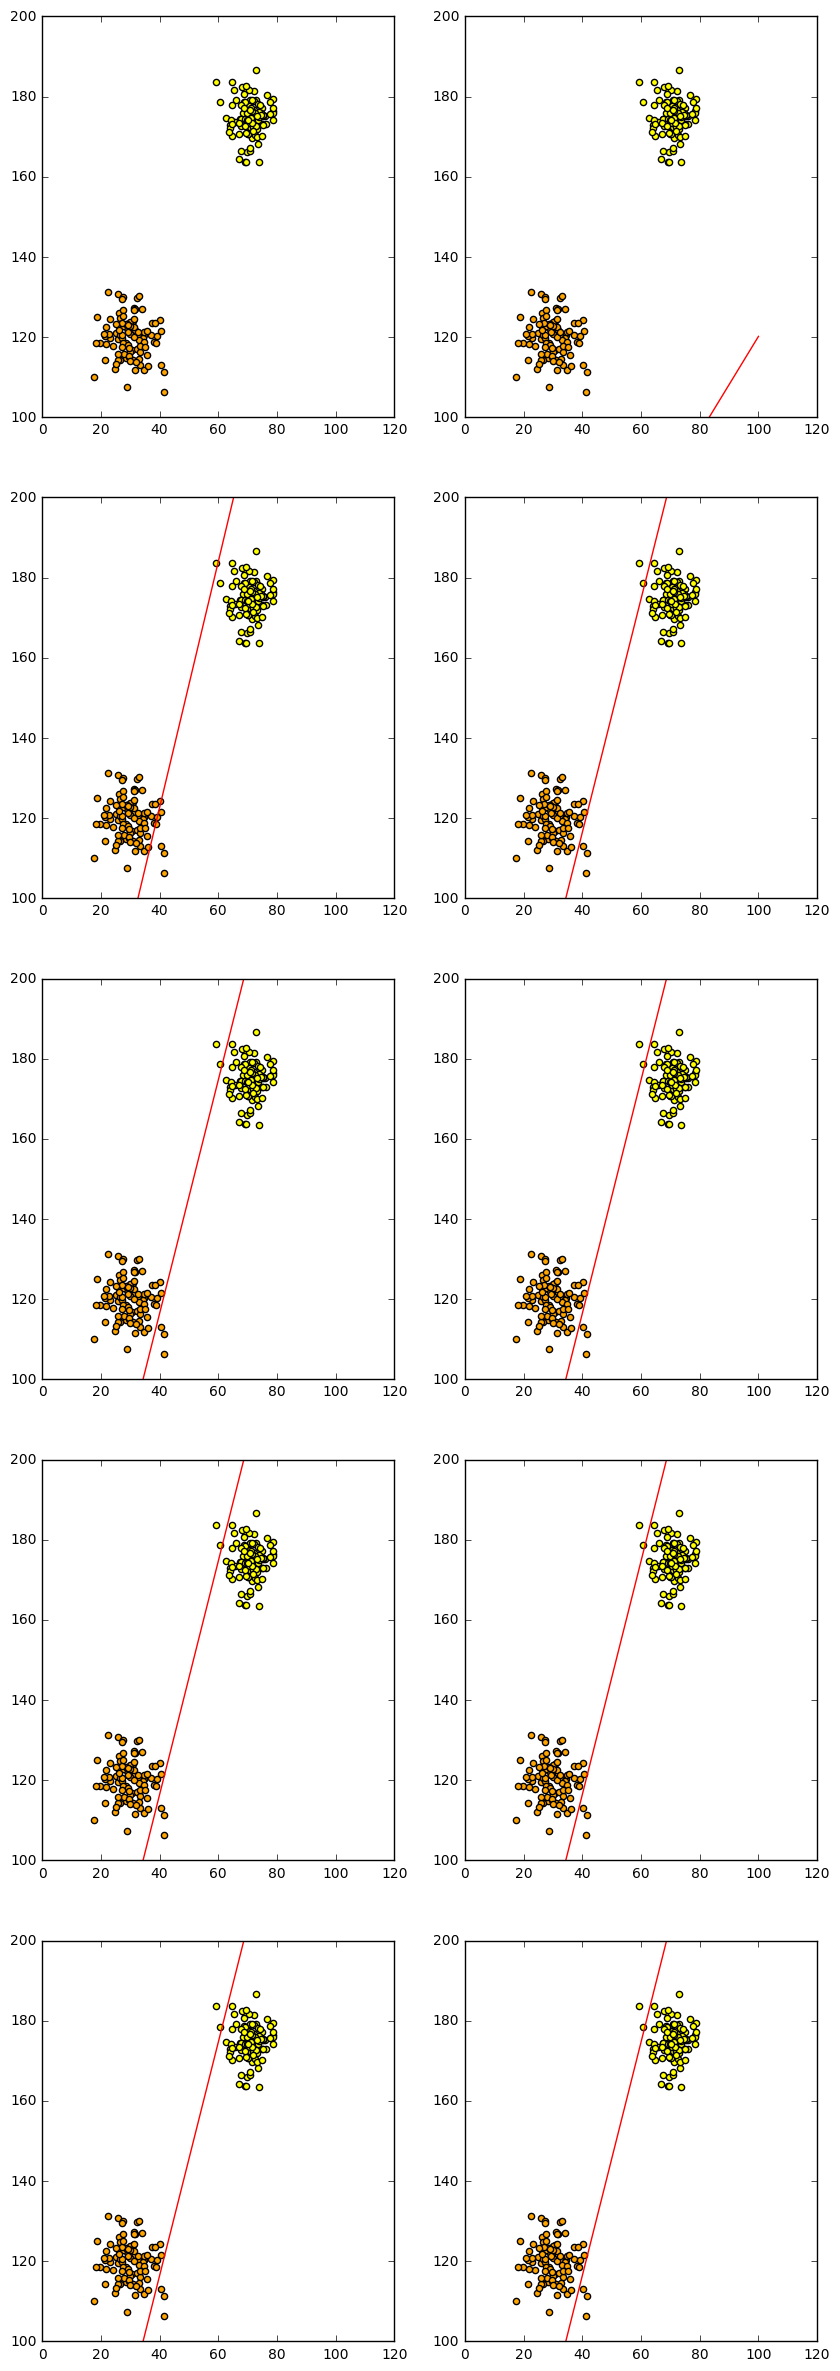

In [203]:
count = 1
fig = plt.figure(figsize=(10,30))

for i in range(1,101):
    print ('cost =',cost(x, w, b, y))
    w, b = update(x, w, b, y, alpha=0.01)
    print ('w =',w)
    print ('b =',b)
    print ('\n')
    
    w1 = w[0][0]
    w2 = w[0][1]
    
    if i % 10 == 0:
        ax = fig.add_subplot(5,2,count)
        ax.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
        ax.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
        line_x = np.linspace(10,100,1000)
        line_y = -(w1/w2)*line_x - b/w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
        ax.set_ylim(100,200)
        ax.plot(line_x, line_y, 'r')
        count += 1

### 1-2) Logistic Regression with scikit-learn

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
model = LogisticRegression()

In [206]:
x = total[:, :2] # weight, height
y = total[:, 2:3] # label
reshaped_y = y.reshape((200,))

In [207]:
model.fit(x,reshaped_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
model.coef_

array([[ 0.54848507, -0.17803965]])

In [209]:
model.intercept_

array([-1.52372686])

In [210]:
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]

print ('w1 =', w1)
print ('w2 =', w2)
print ('b =', b)

w1 = 0.548485065726
w2 = -0.178039652449
b = -1.52372685787


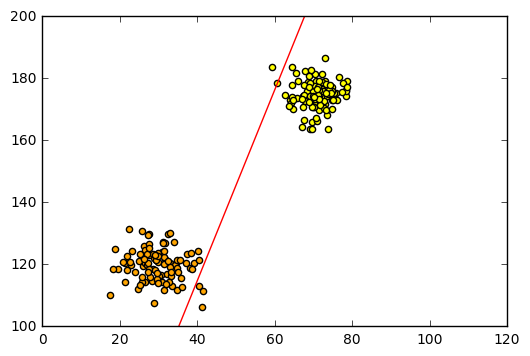

In [211]:
plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
line_x = np.linspace(10,100,1000)
line_y = -(w1/w2)*line_x - b/w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
plt.ylim(100,200)
plt.plot(line_x, line_y, 'r')
plt.show()

### 1-3) Polynomial Linear Regression

In [229]:
m = 100

class1_feature1 = np.random.normal(175, 5, [m, 1])
class1_feature2 = np.random.normal(70, 5, [m, 1])
class1_dataset = np.concatenate((class1_feature2, class1_feature1), axis = 1)

class2_feature1 = np.random.normal(120, 5, [m, 1])
class2_feature2 = np.random.normal(30, 5, [m, 1])
class2_dataset = np.concatenate((class2_feature2, class2_feature1), axis = 1)

class3_feature1 = np.random.normal(140, 5, [m, 1])
class3_feature2 = np.random.normal(90, 5, [m, 1])
class3_dataset = np.concatenate((class3_feature2, class3_feature1), axis = 1)

class1_label = np.zeros(shape=[m,1])
class2_label = np.ones(shape=[m,1])
class3_label = np.empty(shape=[m,1])
class3_label.fill(2)

datasets = np.concatenate((class1_dataset, class2_dataset, class3_dataset))
labels = np.concatenate((class1_label, class2_label, class3_label))

total = np.concatenate((datasets , labels), axis=1)

In [230]:
print (total.shape)
print (total)

(300, 3)
[[  73.13279099  179.26861545    0.        ]
 [  69.0615303   176.95410381    0.        ]
 [  68.41701861  166.78906681    0.        ]
 [  74.30219287  171.10895153    0.        ]
 [  76.67674648  178.12762641    0.        ]
 [  71.38582644  180.76620607    0.        ]
 [  72.09705609  176.8271877     0.        ]
 [  68.72147357  176.84459626    0.        ]
 [  62.70651361  171.07598509    0.        ]
 [  74.22603832  176.76853747    0.        ]
 [  59.04263273  167.19199396    0.        ]
 [  69.7270975   173.94156325    0.        ]
 [  59.56465061  172.48935401    0.        ]
 [  68.28468084  171.66558404    0.        ]
 [  74.2129375   164.5591392     0.        ]
 [  63.38412633  177.80209851    0.        ]
 [  69.96148445  181.663747      0.        ]
 [  62.2833015   168.6103116     0.        ]
 [  79.78825841  182.01047616    0.        ]
 [  72.94717214  178.81200515    0.        ]
 [  73.89799403  163.74501809    0.        ]
 [  69.06750715  173.5548703     0.        ]
 

In [231]:
x = total[:, :2] 
y = total[:, 2:3] 
reshaped_y = y.reshape((300,))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(x,reshaped_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [232]:
model.coef_

array([[-0.10868421,  0.33097099],
       [-0.18908298, -0.10879153],
       [ 0.2977671 , -0.22217958]])

In [233]:
model.intercept_

array([-40.74146227,  27.62193167,  13.11953061])

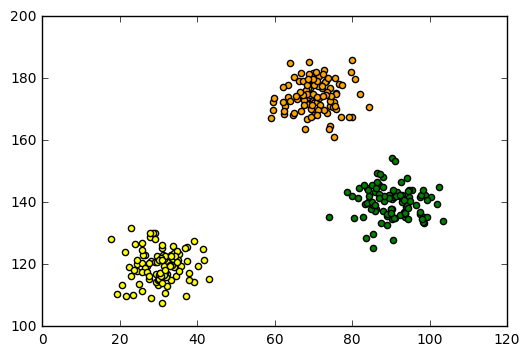

In [234]:
plt.scatter(total[:100,0], total[:100,1], c='orange', label = '0')
plt.scatter(total[100:200,0], total[100:200,1], c='yellow', label = '1')
plt.scatter(total[200:,0], total[200:,1], c='green', label = '2')

In [235]:
model.coef_[0]

array([-0.10868421,  0.33097099])

In [236]:
l1_w1 = model.coef_[0][0]
l1_w2 = model.coef_[0][1]
l1_b = model.intercept_[0]

l2_w1 = model.coef_[1][0]
l2_w2 = model.coef_[1][1]
l2_b = model.intercept_[1]

l3_w1 = model.coef_[2][0]
l3_w2 = model.coef_[2][1]
l3_b = model.intercept_[2]

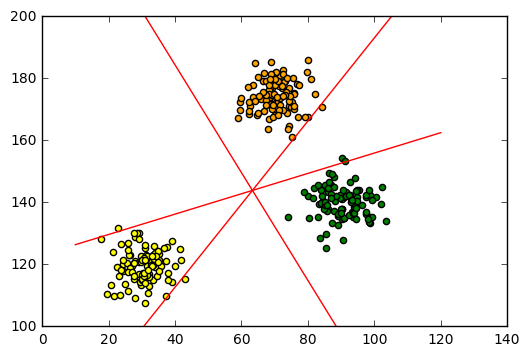

In [237]:
plt.scatter(total[:100,0], total[:100,1], c='orange', label = '0')
plt.scatter(total[100:200,0], total[100:200,1], c='yellow', label = '1')
plt.scatter(total[200:,0], total[200:,1], c='green', label = '2')
line_x = np.linspace(10,120,1000)
plt.ylim(100,200)
line_y1 = -(l1_w1/l1_w2)*line_x - l1_b/l1_w2
line_y2 = -(l2_w1/l2_w2)*line_x - l2_b/l2_w2
line_y3 = -(l3_w1/l3_w2)*line_x - l3_b/l3_w2
plt.plot(line_x, line_y1, 'r')
plt.plot(line_x, line_y2, 'r')
plt.plot(line_x, line_y3, 'r')
plt.show()

In [243]:
test = np.array([[100, 160]])
model.predict(test)

array([ 2.])